# Classification of Handwritten Digits

** Description about MNIST data **

MNIST data is a set of 70,000 small images of handwritten digits by students and employees. Each data point represents a set of labelled images represnting a digit. MNIST is the most studied dataset for a classification model.

** Getting the MNIST data set **

sklearn has modules to download wellknown datasets including MNIST data set

In [1]:
from sklearn.datasets import fetch_mldata
import seaborn as sns

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

Dataset from sklearn usually has dictionary datastructure where'DESCR' key has Description as a value, 'COL_NAMES' has column names as a value, 'data'has array of features and data points as values and 'target' has labels.

In [3]:
X = mnist['data']
y = mnist['target']
y

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
y = y.reshape(70000,1)

In [7]:
y.shape

(70000, 1)

**Let us analyze the data by converting the data into data frames**


In [8]:
import pandas as pd
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

Analyzing input data: Input data has 784 features representing 28*28 pixel of each datapoint.
There are about 7000 such datapoints meaning 7000 images. Each feature has values from 0 to 255, 0 representing white & 255 representing black

In [9]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 52.3 MB


In [10]:
X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


Analyzing labels: output labels has 7000 datapoints each having vales from 0 to 9 representing digits.

In [11]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
0    70000 non-null float64
dtypes: float64(1)
memory usage: 547.0 KB


In [12]:
y_df.describe()

,0
count,70000.000000
mean,4.452429
std,2.890195
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


** Getting data from yann lecunn dataset** 

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [2]:
import idx2numpy

**Extract Training data**

In [3]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [4]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
X_train.shape

(60000, 784)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_train.shape

(60000,)

**Extract Test data**

In [8]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [9]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
X_test.shape

(10000, 784)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
y_test.shape

(10000,)

**Function to display a digit image from one 1-d representation of pixels**

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

**Displaying a set of digits **

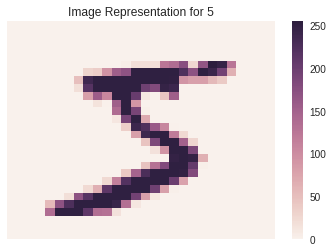

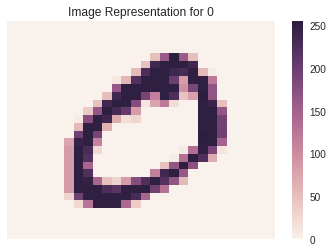

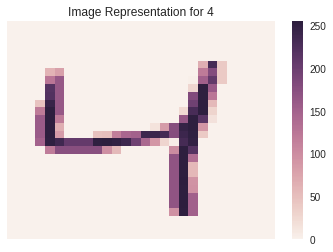

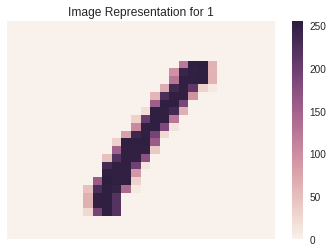

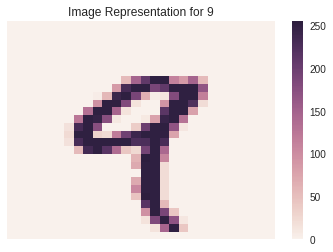

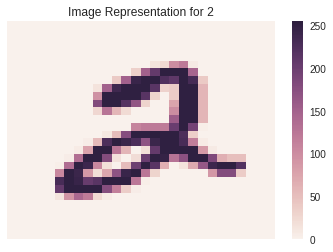

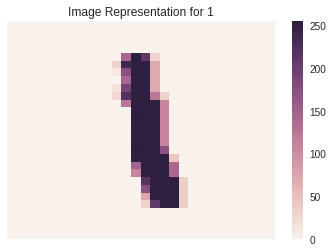

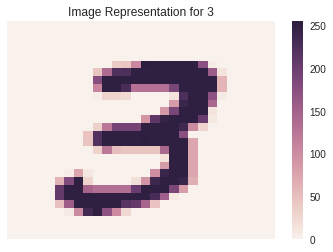

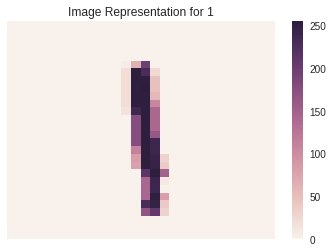

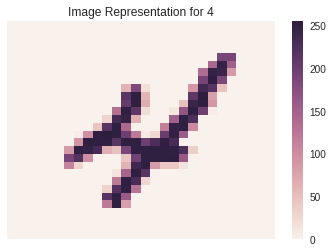

In [14]:
for i in range(10):
    display(X_train[i],y_train[i])

** One Hidden Layer Neural Network with #Epochs=15**

In [15]:
import tensorflow
import keras
import numpy as np
import pandas as pd

from keras.models import Sequential#initialize ann
from keras.layers import Dense#add diff layers in ann


Using TensorFlow backend.


** Normalize the input set to be between 0 to 1 **

In [16]:
X_train_norm = X_train/255
X_test_norm = X_test/255
X_test_norm

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

**Use One hot encoding for the y to convert it to a binary matrix** 

In [17]:
from keras.utils import np_utils
y_train_norm = np_utils.to_categorical(y_train)
y_test_norm = np_utils.to_categorical(y_test)

**Initialize Neural Network**

In [18]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [19]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [20]:
#Adding output layer
classifier.add(Dense(activation="softmax",units=10,kernel_initializer="uniform"))


In [21]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [22]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=15,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 22s 521us/step - loss: 0.4286 - acc: 0.8871 - val_loss: 0.2190 - val_acc: 0.9346
Epoch 2/15
42000/42000 [==============================] - 24s 561us/step - loss: 0.1536 - acc: 0.9547 - val_loss: 0.1364 - val_acc: 0.9604
Epoch 3/15
42000/42000 [==============================] - 31s 731us/step - loss: 0.0975 - acc: 0.9705 - val_loss: 0.1243 - val_acc: 0.9631
Epoch 4/15
42000/42000 [==============================] - 31s 742us/step - loss: 0.0733 - acc: 0.9775 - val_loss: 0.1045 - val_acc: 0.9681
Epoch 5/15
42000/42000 [==============================] - 30s 713us/step - loss: 0.0492 - acc: 0.9851 - val_loss: 0.0979 - val_acc: 0.9718
Epoch 6/15
42000/42000 [==============================] - 30s 705us/step - loss: 0.0370 - acc: 0.9890 - val_loss: 0.0991 - val_acc: 0.9709
Epoch 7/15
42000/42000 [==============================] - 30s 717us/step - loss: 0.0270 - acc: 0.9926 - val_loss: 0.

In [23]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

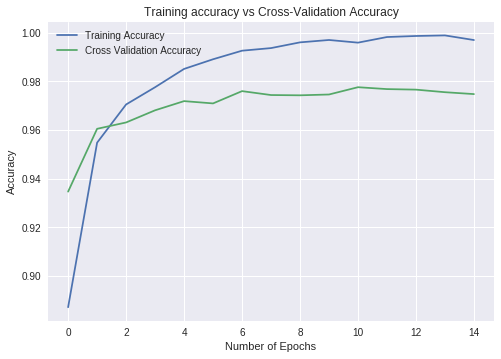

In [24]:
sns.set(style="darkgrid")
x_epoch = range(15)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

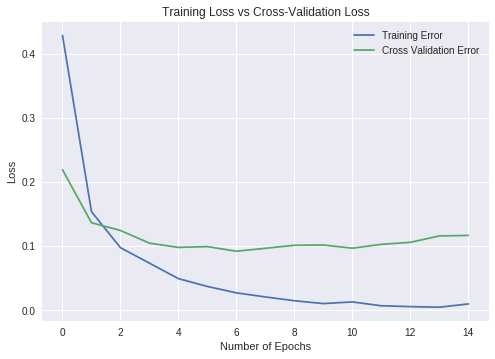

In [25]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [26]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 3s 293us/step


0.095841918708890722

In [27]:
test_accuracy

0.97650000572204587

In [28]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 9,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [29]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 968,    0,    1,    2,    2,    1,    1,    2,    1,    2],
       [   0, 1123,    2,    2,    0,    0,    1,    1,    5,    1],
       [   7,    1, 1003,    4,    2,    0,    2,    7,    5,    1],
       [   0,    0,    3,  997,    0,    2,    0,    2,    2,    4],
       [   0,    1,    1,    2,  950,    0,    7,    2,    3,   16],
       [   2,    0,    0,   17,    1,  862,    2,    1,    5,    2],
       [   2,    3,    0,    1,    4,    6,  941,    0,    1,    0],
       [   0,    3,   11,   10,    0,    0,    0,  991,    3,   10],
       [   7,    0,    2,    8,    3,    1,    3,    2,  943,    5],
       [   3,    3,    0,    7,    3,    2,    0,    3,    1,  987]])

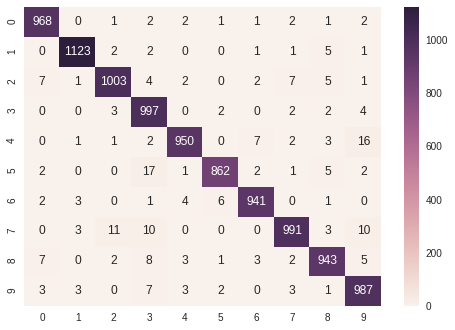

In [30]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [31]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

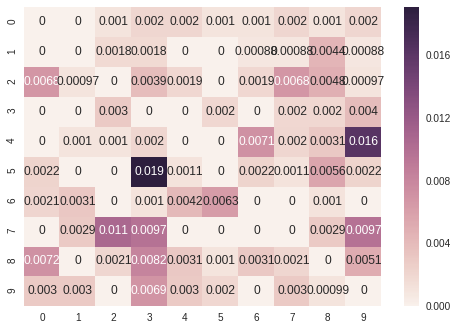

In [32]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.97650000000000003

**One Hidden Layer Neural Network with #Epochs=3**

**Initialize Neural Network**

In [49]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [50]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [51]:
#Adding output layer
classifier.add(Dense(activation="softmax",units=10,kernel_initializer="uniform"))


In [52]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [53]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=3,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 33s 780us/step - loss: 0.4432 - acc: 0.8787 - val_loss: 0.2239 - val_acc: 0.9361
Epoch 2/3
42000/42000 [==============================] - 32s 763us/step - loss: 0.1729 - acc: 0.9479 - val_loss: 0.1530 - val_acc: 0.9541
Epoch 3/3
42000/42000 [==============================] - 28s 658us/step - loss: 0.1158 - acc: 0.9660 - val_loss: 0.1342 - val_acc: 0.9588


In [54]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

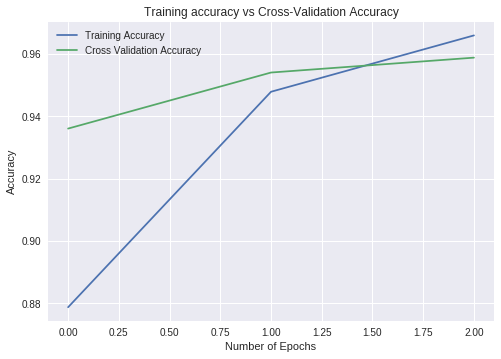

In [55]:
sns.set(style="darkgrid")
x_epoch = range(3)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

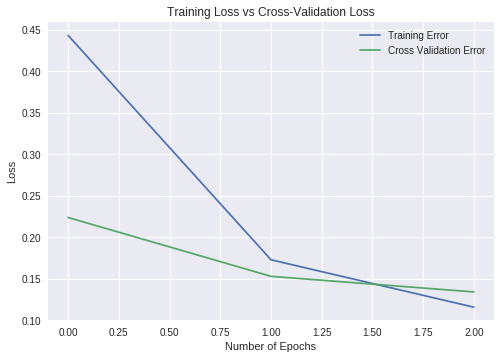

In [56]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [57]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 3s 317us/step


0.11382649064878933

In [58]:
test_accuracy

0.96380000472068783

In [59]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 5,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [60]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 965,    0,    0,    2,    1,    2,    6,    2,    1,    1],
       [   0, 1125,    2,    1,    0,    1,    4,    0,    2,    0],
       [  10,    6,  997,    4,    0,    1,    4,    6,    3,    1],
       [   1,    0,    7,  940,    0,   42,    0,    8,   10,    2],
       [   2,    0,    2,    1,  937,    1,   11,    2,    2,   24],
       [   2,    0,    0,    1,    1,  873,   10,    0,    3,    2],
       [   7,    3,    1,    0,    2,    8,  934,    0,    3,    0],
       [   0,   13,   10,    5,    1,    1,    0,  990,    0,    8],
       [  13,    1,    3,    6,    3,   18,   10,    5,  911,    4],
       [   5,    6,    1,    7,    9,   11,    0,    4,    0,  966]])

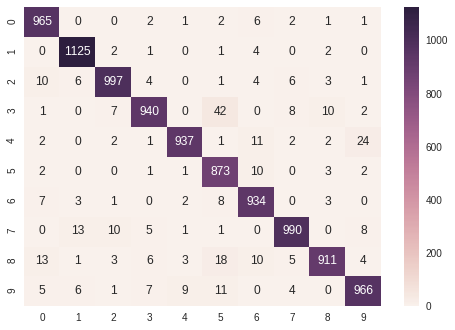

In [61]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [62]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

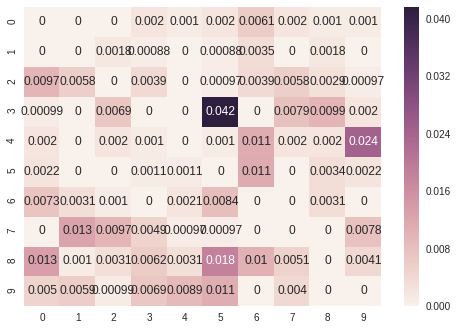

In [63]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.96379999999999999

**One Hidden Layer Neural Network with #Epochs=30**

**Initialize Neural Network**

In [65]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [66]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [67]:
#Adding output layer
classifier.add(Dense(activation="softmax",units=10,kernel_initializer="uniform"))


In [68]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [69]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=30,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 25s 604us/step - loss: 0.4385 - acc: 0.8819 - val_loss: 0.2170 - val_acc: 0.9363
Epoch 2/30
42000/42000 [==============================] - 24s 580us/step - loss: 0.1741 - acc: 0.9494 - val_loss: 0.1613 - val_acc: 0.9551
Epoch 3/30
42000/42000 [==============================] - 21s 500us/step - loss: 0.1175 - acc: 0.9648 - val_loss: 0.1296 - val_acc: 0.9631
Epoch 4/30
42000/42000 [==============================] - 26s 619us/step - loss: 0.0820 - acc: 0.9756 - val_loss: 0.1146 - val_acc: 0.9673
Epoch 5/30
42000/42000 [==============================] - 22s 533us/step - loss: 0.0622 - acc: 0.9816 - val_loss: 0.1116 - val_acc: 0.9689
Epoch 6/30
42000/42000 [==============================] - 23s 538us/step - loss: 0.0473 - acc: 0.9860 - val_loss: 0.1028 - val_acc: 0.9708
Epoch 7/30
42000/42000 [==============================] - 24s 573us/step - loss: 0.0357 - acc: 0.9890 - val_loss: 0.

In [70]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

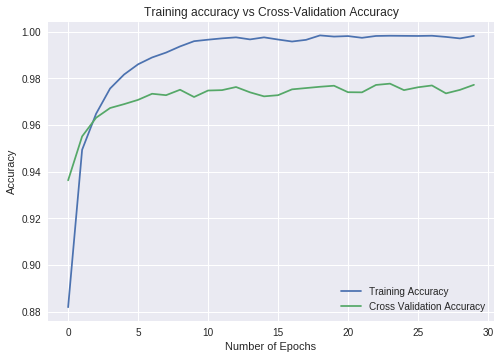

In [71]:
sns.set(style="darkgrid")
x_epoch = range(30)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

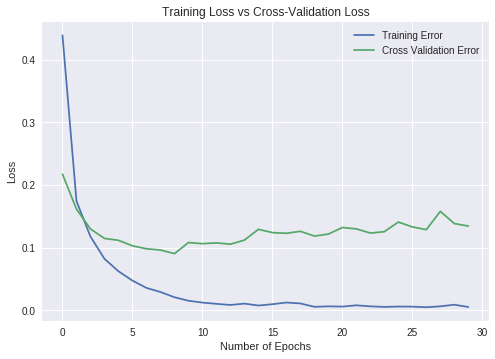

In [72]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [73]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 3s 281us/step


0.10614490627549544

In [74]:
test_accuracy

0.97990000844001768

In [75]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [76]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 971,    0,    0,    1,    2,    0,    3,    0,    1,    2],
       [   0, 1128,    1,    0,    0,    0,    2,    0,    4,    0],
       [   3,    1, 1016,    1,    0,    0,    0,    4,    7,    0],
       [   0,    1,    3,  984,    0,    1,    0,    5,    6,   10],
       [   0,    0,    2,    0,  957,    0,    5,    2,    3,   13],
       [   3,    0,    0,   10,    1,  860,    7,    0,    6,    5],
       [   3,    2,    0,    1,    5,    2,  940,    1,    4,    0],
       [   1,    4,    7,    1,    2,    0,    0, 1001,    5,    7],
       [   2,    0,    3,    2,    2,    1,    0,    3,  957,    4],
       [   1,    3,    0,    0,    9,    4,    0,    2,    5,  985]])

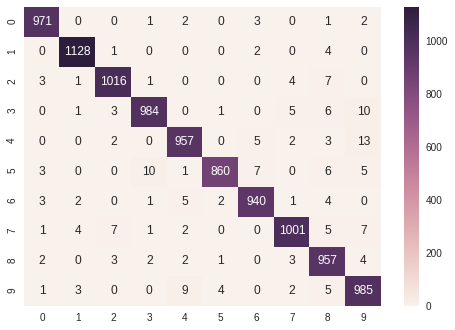

In [77]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [78]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

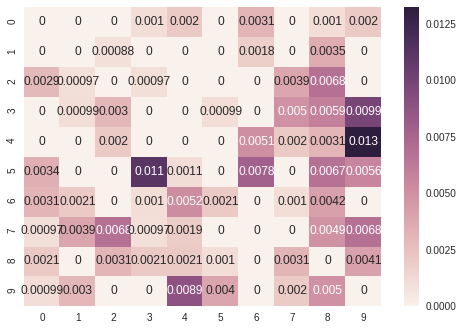

In [79]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.97989999999999999

**One Hidden Layer Neural Network with sigmoid activation function **

**Initialize Neural Network**

In [81]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [82]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [83]:
#Adding output layer
classifier.add(Dense(activation="sigmoid",units=10,kernel_initializer="uniform"))


In [84]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [85]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=15,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 28s 670us/step - loss: 0.4958 - acc: 0.8654 - val_loss: 0.2889 - val_acc: 0.9129
Epoch 2/15
42000/42000 [==============================] - 29s 694us/step - loss: 0.2139 - acc: 0.9392 - val_loss: 0.1761 - val_acc: 0.9484
Epoch 3/15
42000/42000 [==============================] - 28s 672us/step - loss: 0.1452 - acc: 0.9575 - val_loss: 0.1531 - val_acc: 0.9559
Epoch 4/15
42000/42000 [==============================] - 28s 669us/step - loss: 0.1093 - acc: 0.9672 - val_loss: 0.1297 - val_acc: 0.9619
Epoch 5/15
42000/42000 [==============================] - 25s 590us/step - loss: 0.0881 - acc: 0.9733 - val_loss: 0.1139 - val_acc: 0.9670
Epoch 6/15
42000/42000 [==============================] - 21s 510us/step - loss: 0.0712 - acc: 0.9781 - val_loss: 0.1151 - val_acc: 0.9667
Epoch 7/15
42000/42000 [==============================] - 21s 489us/step - loss: 0.0554 - acc: 0.9834 - val_loss: 0.

In [86]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

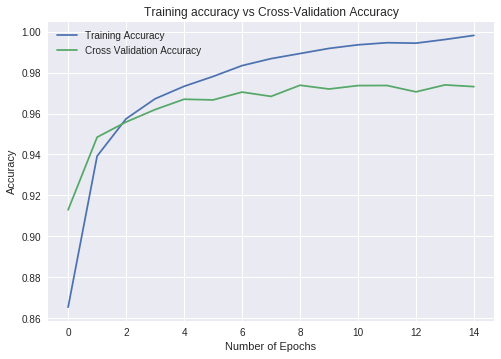

In [87]:
sns.set(style="darkgrid")
x_epoch = range(15)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

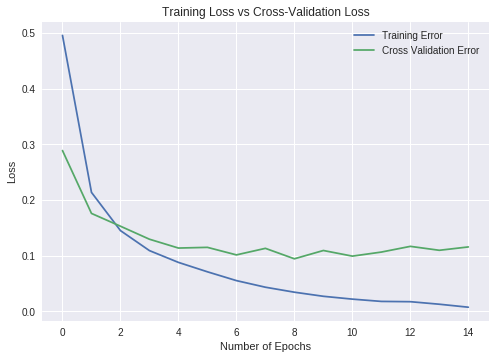

In [88]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [89]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 3s 260us/step


0.098155021241036589

In [90]:
test_accuracy

0.97690000474452976

In [91]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 9,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 5,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [92]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 968,    0,    0,    2,    1,    2,    3,    0,    1,    3],
       [   0, 1117,    4,    1,    0,    1,    3,    1,    6,    2],
       [   6,    1, 1010,    2,    2,    0,    2,    4,    5,    0],
       [   1,    0,    3,  978,    0,   12,    0,    3,    2,   11],
       [   1,    0,    1,    1,  949,    0,    3,    1,    1,   25],
       [   3,    0,    0,    3,    1,  876,    5,    0,    2,    2],
       [   4,    2,    1,    1,    2,    4,  943,    0,    1,    0],
       [   0,    5,    8,    3,    0,    0,    0,  994,    3,   15],
       [   7,    0,    3,    5,    5,    7,    2,    3,  936,    6],
       [   1,    1,    0,    2,    2,    4,    0,    1,    0,  998]])

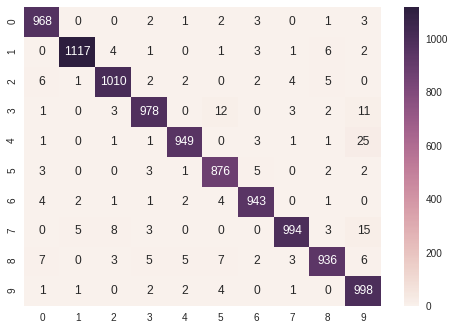

In [93]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [94]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

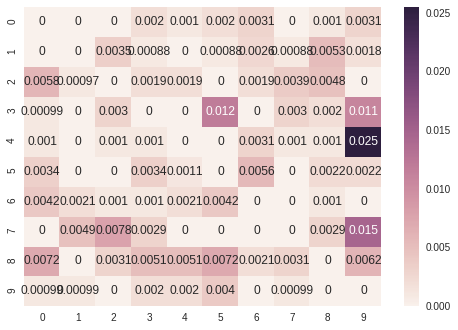

In [95]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.97689999999999999

**One Hidden Layer Neural Network with tanh activation function **

**Initialize Neural Network**

In [97]:
classifier = Sequential()


**Add input layer & Hidden layer **


In [98]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [99]:
#Adding output layer
classifier.add(Dense(activation="tanh",units=10,kernel_initializer="uniform"))


In [100]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [101]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=15,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 29s 682us/step - loss: nan - acc: 0.1820 - val_loss: nan - val_acc: 0.0989
Epoch 2/15
42000/42000 [==============================] - 30s 715us/step - loss: nan - acc: 0.0986 - val_loss: nan - val_acc: 0.0989
Epoch 3/15
42000/42000 [==============================] - 29s 700us/step - loss: nan - acc: 0.0986 - val_loss: nan - val_acc: 0.0989
Epoch 4/15
42000/42000 [==============================] - 28s 676us/step - loss: nan - acc: 0.0986 - val_loss: nan - val_acc: 0.0989
Epoch 5/15
42000/42000 [==============================] - 33s 777us/step - loss: nan - acc: 0.0986 - val_loss: nan - val_acc: 0.0989
Epoch 6/15
42000/42000 [==============================] - 29s 696us/step - loss: nan - acc: 0.0986 - val_loss: nan - val_acc: 0.0989
Epoch 7/15
42000/42000 [==============================] - 29s 687us/step - loss: nan - acc: 0.0986 - val_loss: nan - val_acc: 0.0989
Epoch 8/15
42000/42

In [102]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

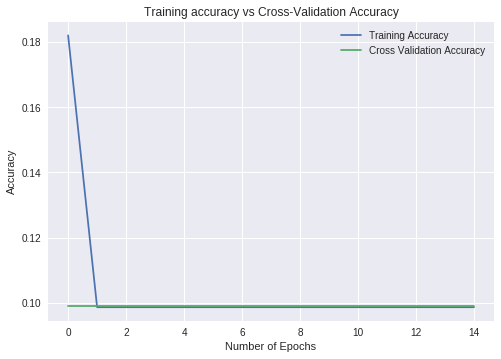

In [103]:
sns.set(style="darkgrid")
x_epoch = range(15)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

In [104]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 3s 274us/step


nan

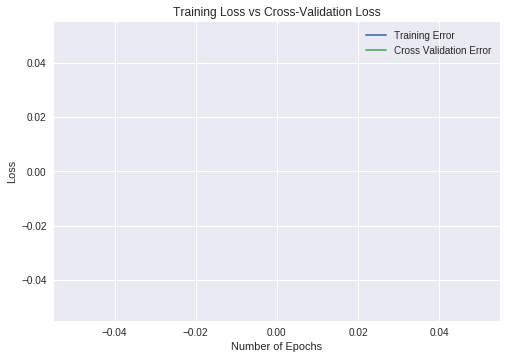

In [105]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])


In [106]:
test_accuracy

0.097999999932944781

In [107]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


**Plot Confusion Matrix against Test data**

In [108]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 980,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1135,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1032,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1010,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 982,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 892,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 958,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1028,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 974,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1009,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

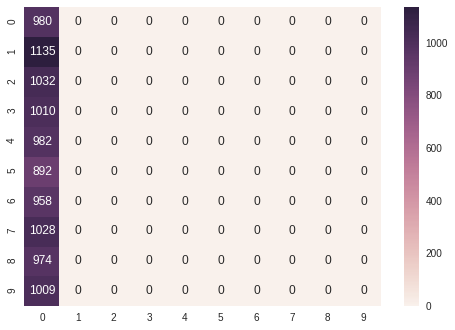

In [109]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [110]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

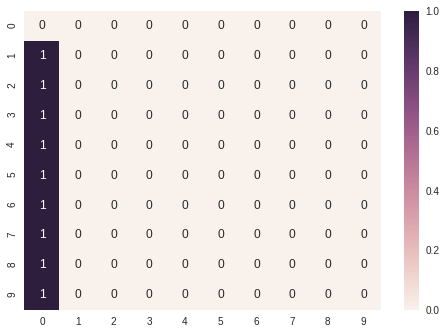

In [111]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.098000000000000004

**Evaluate the performance against size of the training data of size 50000**

** Normalize the input set to be between 0 to 1 **

In [113]:
from sklearn.utils import shuffle
X_shuffle,y_shuffle = shuffle(X_train,y_train)
X_trunc = X_shuffle[0:50000]
y_trunc = y_shuffle[0:50000]
X_train_norm = X_trunc/255
X_test_norm = X_test/255
X_train_norm.shape

(50000, 784)

**Use One hot encoding for the y to convert it to a binary matrix** 

In [114]:
from keras.utils import np_utils
y_train_norm = np_utils.to_categorical(y_trunc)
y_test_norm = np_utils.to_categorical(y_test)

**Initialize Neural Network**

In [115]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [116]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [117]:
#Adding output layer
classifier.add(Dense(activation="softmax",units=10,kernel_initializer="uniform"))


In [118]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [119]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=15,verbose=1, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/15
35000/35000 [==============================] - 23s 653us/step - loss: 0.4647 - acc: 0.8759 - val_loss: 0.2492 - val_acc: 0.9263
Epoch 2/15
35000/35000 [==============================] - 24s 676us/step - loss: 0.1793 - acc: 0.9468 - val_loss: 0.1626 - val_acc: 0.9527
Epoch 3/15
35000/35000 [==============================] - 19s 531us/step - loss: 0.1175 - acc: 0.9650 - val_loss: 0.1313 - val_acc: 0.9605
Epoch 4/15
35000/35000 [==============================] - 19s 530us/step - loss: 0.0848 - acc: 0.9746 - val_loss: 0.1079 - val_acc: 0.9681
Epoch 5/15
35000/35000 [==============================] - 19s 542us/step - loss: 0.0618 - acc: 0.9817 - val_loss: 0.0977 - val_acc: 0.9701
Epoch 6/15
35000/35000 [==============================] - 20s 561us/step - loss: 0.0458 - acc: 0.9863 - val_loss: 0.1048 - val_acc: 0.9691
Epoch 7/15
35000/35000 [==============================] - 24s 678us/step - loss: 0.0328 - acc: 0.9907 - val_loss: 0.

In [120]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

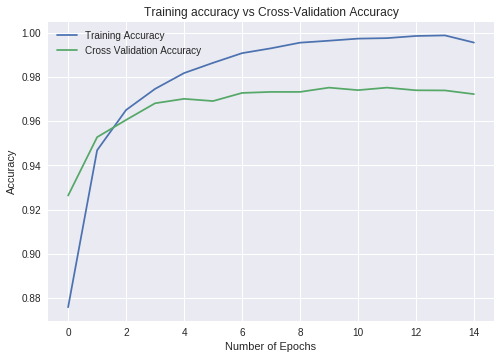

In [121]:
sns.set(style="darkgrid")
x_epoch = range(15)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

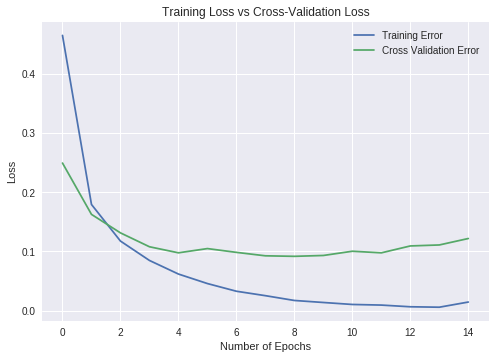

In [122]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [123]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 3s 273us/step


0.1095275295358806

In [124]:
test_accuracy

0.97360000491142273

In [125]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 4,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [126]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 973,    1,    0,    1,    0,    0,    2,    0,    1,    2],
       [   0, 1125,    6,    0,    0,    1,    2,    0,    1,    0],
       [   5,    0, 1012,    1,    3,    1,    2,    4,    4,    0],
       [   2,    0,   10,  975,    1,    1,    2,   11,    2,    6],
       [   1,    1,    5,    0,  968,    0,    1,    2,    1,    3],
       [   4,    0,    0,   14,    2,  849,   11,    1,    4,    7],
       [   5,    2,    1,    1,    8,    3,  933,    1,    4,    0],
       [   2,    6,    7,    0,    0,    0,    0, 1006,    3,    4],
       [  14,    1,    8,    2,    4,    6,    3,    9,  922,    5],
       [   2,    5,    0,    5,   12,    1,    0,   10,    1,  973]])

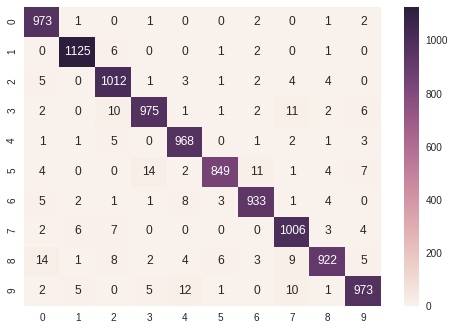

In [127]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [128]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

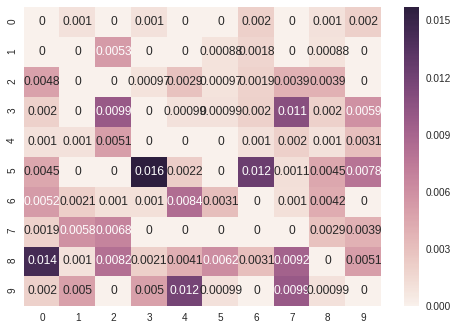

In [129]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.97360000000000002

**Evaluate the performance against size of the training data of size 30000**

** Normalize the input set to be between 0 to 1 **

In [131]:
from sklearn.utils import shuffle
X_shuffle,y_shuffle = shuffle(X_train,y_train)
X_trunc = X_shuffle[0:30000]
y_trunc = y_shuffle[0:30000]
X_train_norm = X_trunc/255
X_test_norm = X_test/255
X_train_norm.shape

(30000, 784)

**Use One hot encoding for the y to convert it to a binary matrix** 

In [132]:
from keras.utils import np_utils
y_train_norm = np_utils.to_categorical(y_trunc)
y_test_norm = np_utils.to_categorical(y_test)

**Initialize Neural Network**

In [133]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [134]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [135]:
#Adding output layer
classifier.add(Dense(activation="softmax",units=10,kernel_initializer="uniform"))


In [136]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [137]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=15,verbose=1, validation_split=0.3)

Train on 21000 samples, validate on 9000 samples
Epoch 1/15
21000/21000 [==============================] - 11s 519us/step - loss: 0.6037 - acc: 0.8394 - val_loss: 0.3153 - val_acc: 0.9109
Epoch 2/15
21000/21000 [==============================] - 10s 493us/step - loss: 0.2318 - acc: 0.9328 - val_loss: 0.2223 - val_acc: 0.9377
Epoch 3/15
21000/21000 [==============================] - 10s 494us/step - loss: 0.1618 - acc: 0.9514 - val_loss: 0.1850 - val_acc: 0.9452
Epoch 4/15
21000/21000 [==============================] - 10s 484us/step - loss: 0.1201 - acc: 0.9644 - val_loss: 0.1744 - val_acc: 0.9468
Epoch 5/15
21000/21000 [==============================] - 10s 488us/step - loss: 0.0959 - acc: 0.9716 - val_loss: 0.1394 - val_acc: 0.9582
Epoch 6/15
21000/21000 [==============================] - 10s 488us/step - loss: 0.0683 - acc: 0.9802 - val_loss: 0.1370 - val_acc: 0.9594
Epoch 7/15
21000/21000 [==============================] - 10s 486us/step - loss: 0.0531 - acc: 0.9854 - val_loss: 0.1

In [138]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

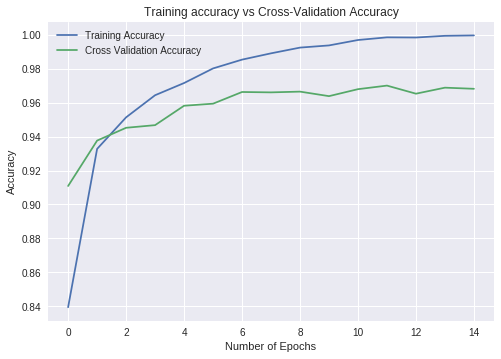

In [139]:
sns.set(style="darkgrid")
x_epoch = range(15)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")
plt.legend(["Training Accuracy","Cross Validation Accuracy"])

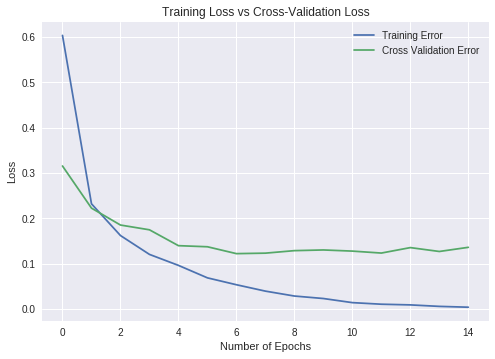

In [140]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")
plt.legend(["Training Error","Cross Validation Error"])

In [141]:
test_loss, test_accuracy= classifier.evaluate(X_test_norm,y_test_norm,batch_size=100)
test_loss

10000/10000 [==============================] - 3s 292us/step


0.11127898864367125

In [142]:
test_accuracy

0.97090000748634342

In [143]:
y_test_pred = classifier.predict(X_test_norm)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [144]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 968,    1,    1,    1,    1,    1,    3,    1,    2,    1],
       [   0, 1124,    2,    3,    0,    1,    2,    0,    3,    0],
       [   5,    2,  995,   10,    2,    1,    4,    6,    7,    0],
       [   0,    0,    4,  993,    1,    4,    0,    5,    3,    0],
       [   2,    1,    4,    1,  956,    0,    3,    3,    1,   11],
       [   3,    1,    0,   12,    1,  861,    5,    4,    4,    1],
       [   6,    3,    1,    1,    9,    8,  926,    0,    4,    0],
       [   1,    9,    6,    8,    0,    0,    0,  999,    1,    4],
       [   5,    1,    1,   17,    6,    9,    4,    4,  924,    3],
       [   1,    4,    0,   10,   12,    2,    1,   11,    5,  963]])

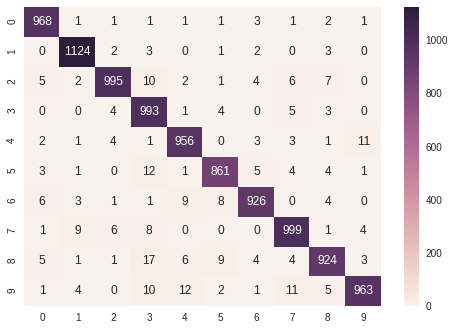

In [145]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [146]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

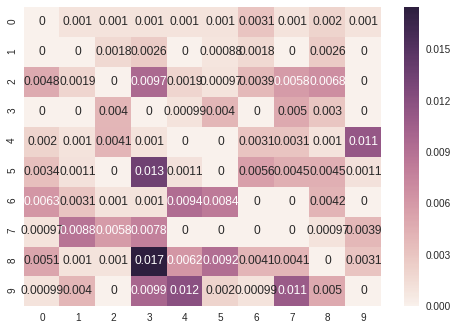

In [147]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.97089999999999999